In [2]:
import pandas as pd
import seaborn as se
import pickle
from collections import Counter
import numpy as np
import os
import pickle
from timeit import timeit
import json
from timeit import default_timer as timer
from pathlib import Path
import shutil
import math
import matplotlib.pyplot as plt
from math import sqrt
from tqdm import tqdm
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt


In [3]:
se.set_style("darkgrid")

Text(0.5, 1.0, 'Bandwidth distribution')

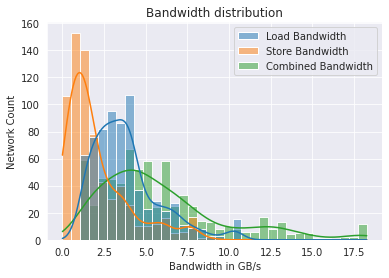

In [4]:
arch_metrics = pd.read_csv('../data/arch_metrics_iofmap_1mb.csv', index_col=[0,1],)

bw_df = arch_metrics.groupby(level = 0).mean().loc[:, arch_metrics.columns.isin(['load_bw', 'store_bw'])].div(2**30)
bw_df["combined"] = bw_df["load_bw"] + bw_df["store_bw"]
bw_df = bw_df.rename(columns={'load_bw': "Load Bandwidth", "store_bw": "Store Bandwidth", "combined":"Combined Bandwidth"})
plt = se.histplot(data = bw_df, kde=True)
plt.set_xlabel('Bandwidth in GB/s')
plt.set_ylabel('Network Count')
plt.set_title('Bandwidth distribution')

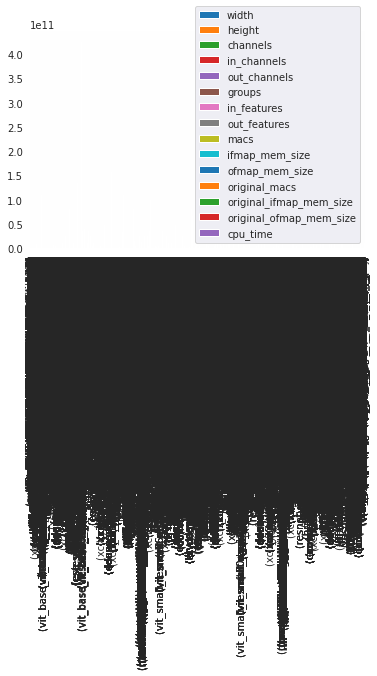

In [25]:
layer_metrics = pd.read_csv(
    "../data/layer_metrics.csv",
    index_col=[0, 1],
)
conv_layers = layer_metrics[layer_metrics.index.isin(layer_metrics['lowered/lifted'].dropna().index)]
plt = conv_layers.plot(kind='bar')

In [10]:
layer_metrics[layer_metrics['type'] == 'linear']

width  height  channels  \
tf_efficientnet_b0        classifier                      1       1      1280   
swsl_resnext101_32x8d     fc                              1       1      2048   
efficientnet_b8           classifier                      1       1      2816   
tf_efficientnetv2_l_in21k classifier                      1       1      1280   
ese_vovnet19b_slim        head.fc                         1       1       512   
...                                                     ...     ...       ...   
gmixer_24_224             blocks.22.mlp_channels.fc2      1     196       768   
                          blocks.23.mlp_channels.fc2      1     196       768   
                          head                            1       1       384   
cspresnet50w              head.fc                         1       1      2048   
regnetx_064               head.fc                         1       1      1624   

                                                      in_channels  \
tf_efficientnet_b0        classifier                          NaN   
swsl_resnext101_32x8d     fc                                  NaN   
efficientnet_b8           classifier                          NaN   
tf_efficientnetv2_l_in21k classifier                          NaN   
ese_vovnet19b_slim        head.fc                             NaN   
...                                                           ...   
gmixer_24_224             blocks.22.mlp_channels.fc2          NaN   
                          blocks.23.mlp_channels.fc2          NaN   
                          head                                NaN   
cspresnet50w              head.fc                             NaN   
regnetx_064               head.fc                             NaN   

                                                      out_channels  \
tf_efficientnet_b0        classifier                           NaN   
swsl_resnext101_32x8d     fc                                   NaN   
efficientnet_b8           classifier                           NaN   
tf_efficientnetv2_l_in21k classifier                           NaN   
ese_vovnet19b_slim        head.fc                              NaN   
...                                                            ...   
gmixer_24_224             blocks.22.mlp_channels.fc2           NaN   
                          blocks.23.mlp_channels.fc2           NaN   
                          head                                 NaN   
cspresnet50w              head.fc                              NaN   
regnetx_064               head.fc                              NaN   

                                                     kernel_size stride  \
tf_efficientnet_b0        classifier                         NaN    NaN   
swsl_resnext101_32x8d     fc                                 NaN    NaN   
efficientnet_b8           classifier                         NaN    NaN   
tf_efficientnetv2_l_in21k classifier                         NaN    NaN   
ese_vovnet19b_slim        head.fc                            NaN    NaN   
...                                                          ...    ...   
gmixer_24_224             blocks.22.mlp_channels.fc2         NaN    NaN   
                          blocks.23.mlp_channels.fc2         NaN    NaN   
                          head                               NaN    NaN   
cspresnet50w              head.fc                            NaN    NaN   
regnetx_064               head.fc                            NaN    NaN   

                                                     padding dilation  groups  \
tf_efficientnet_b0        classifier                     NaN      NaN     NaN   
swsl_resnext101_32x8d     fc                             NaN      NaN     NaN   
efficientnet_b8           classifier                     NaN      NaN     NaN   
tf_efficientnetv2_l_in21k classifier                     NaN      NaN     NaN   
ese_vovnet19b_slim        head.fc                        NaN      NaN     NaN   
...                     